### Telco Customer Churn Prediction using Logistic Regression

###### Objective

The goal of this project is to predict customer churn for a telecommunications company by analyzing customer demographics, financial preferences, and service usage.  
Using Logistic Regression, we aim to:

- Identify the most influential factors driving churn.
- Generate actionable business recommendations.
- Provide interpretable insights through model coefficients.


##### Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code

##### 1. Import Libraries and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'C:\Users\dimas\Downloads\archive (20)/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


##### 2. Understanding Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### 3. Data Cleaning

##### 3.1 Convert Data Types

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [8]:
df.dropna(subset=['TotalCharges'], inplace=True)

##### 3.2 Drop irrelevant Column

In [9]:
df.drop('customerID', axis=1, inplace=True)

##### 3.3 Missing Values

In [10]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### 5. Exploratory Data Analysis

##### 5.1 Churn Ratio

In [11]:
churn_counts = df['Churn'].value_counts()

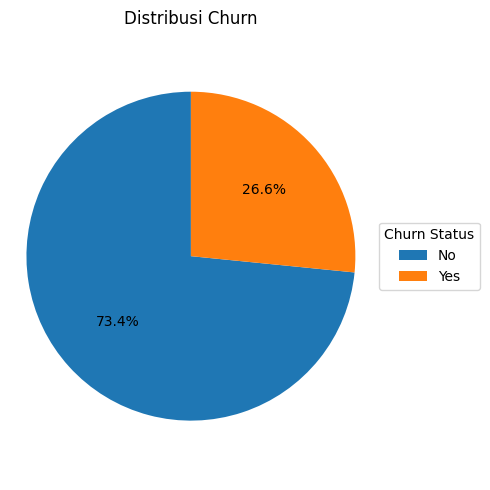

In [12]:
# Pie chart
plt.figure(figsize=(5, 5))
plt.pie(churn_counts, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Churn')
plt.axis('equal')

# Tambahkan legend di luar pie chart
plt.legend(labels=churn_counts.index,
           title='Churn Status',
           loc='center left',
           bbox_to_anchor=(1, 0.5))  # Geser legend ke kanan
plt.tight_layout()
plt.show()

##### 5.2 Automated EDA: Demographics, Financial, and Services Categories Based on Churn

In [13]:
Demografi_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
Financial_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']
Service_cols = ['PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport', 'StreamingTV', 'StreamingMovies']

In [14]:
def format_title(col_name):
    return 'Churn Based on ' + col_name.replace('_', ' ').title()

In [15]:
def plot_grouped_categorical(cols, group_name):
    for col in cols:
        plt.figure(figsize=(6, 4))
        sns.countplot(x=col, hue='Churn', data=df)
        plt.title(format_title(col))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

###### 5.2.1 Analyzing Churn Patterns by Demographic Factors

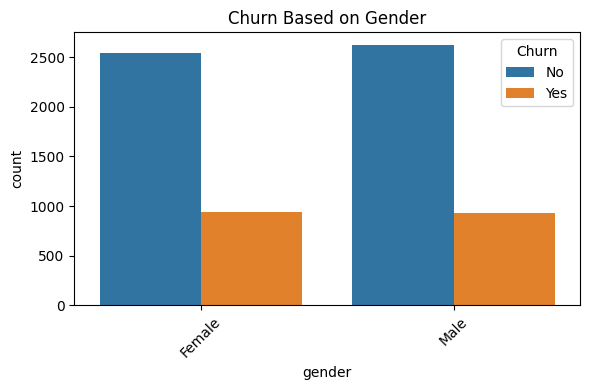

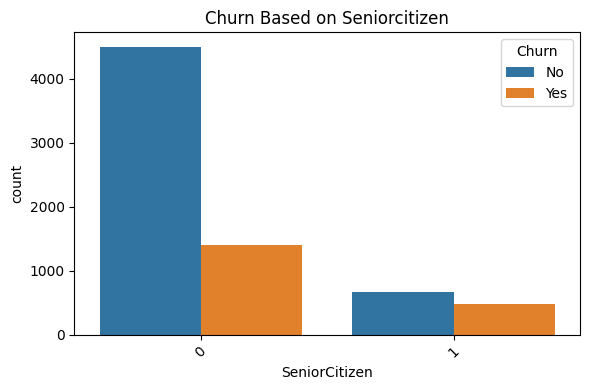

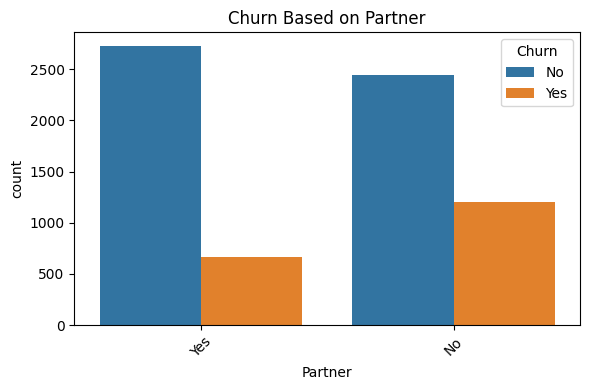

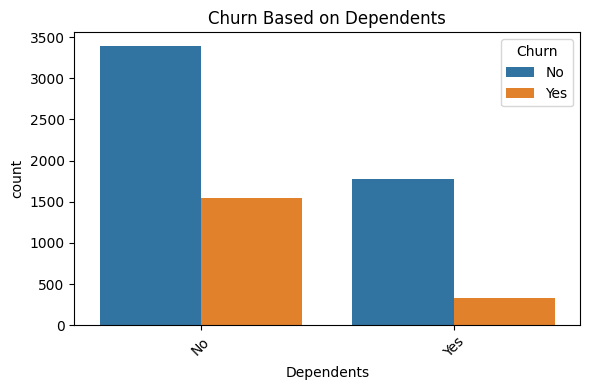

In [16]:
plot_grouped_categorical(Demografi_cols, 'Demographics')

###### 5.2.2 Analyzing Churn Patterns by Financial Factors

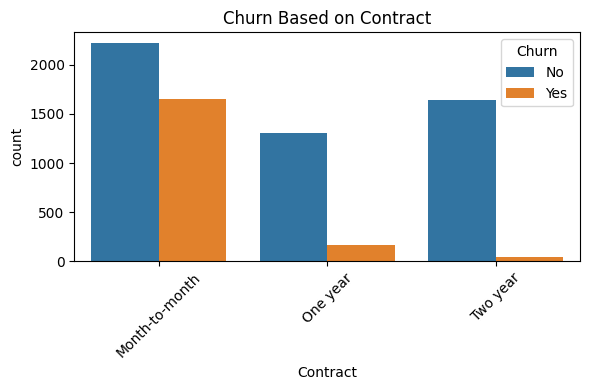

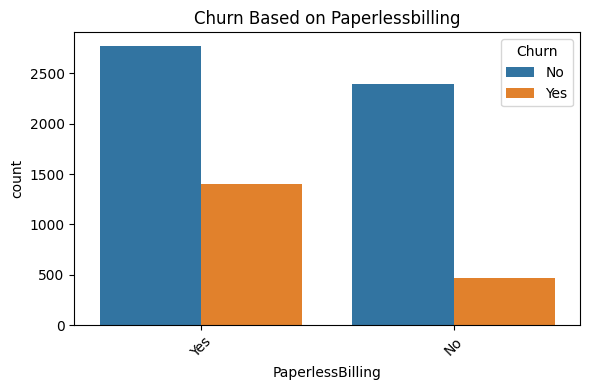

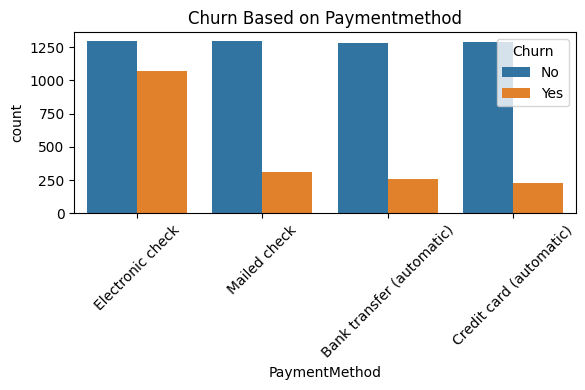

In [17]:
plot_grouped_categorical(Financial_cols, 'Financial')

###### 5.2.3 Analyzing Churn Patterns by Subscribed Services Factors

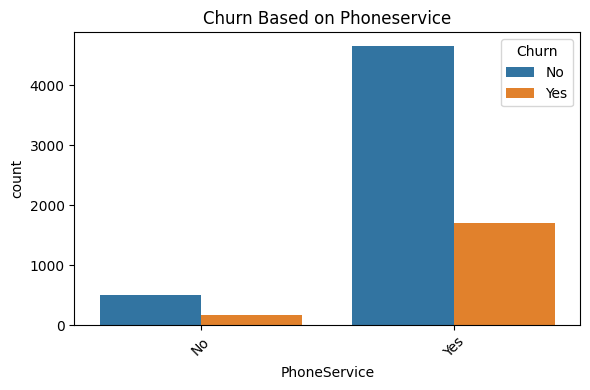

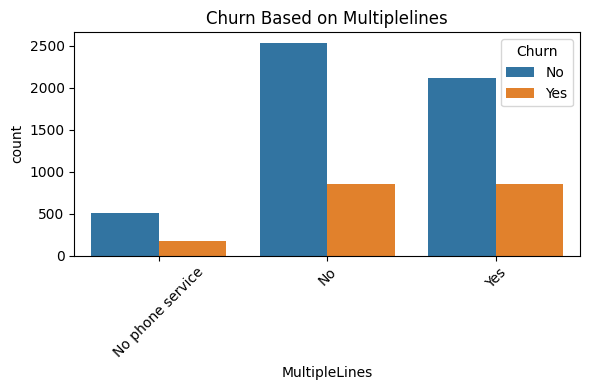

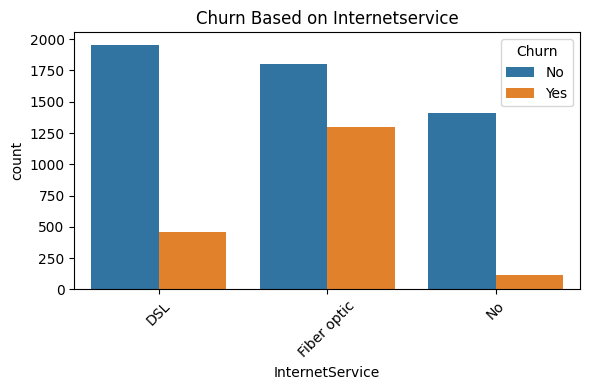

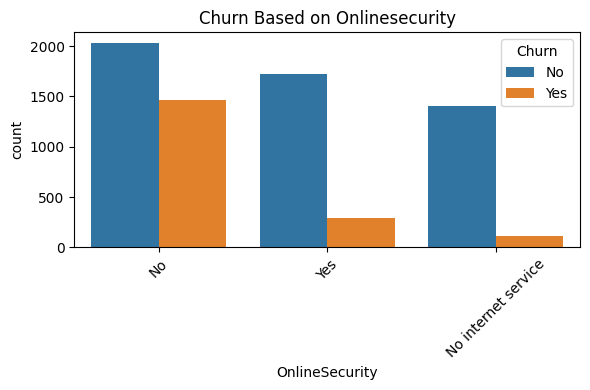

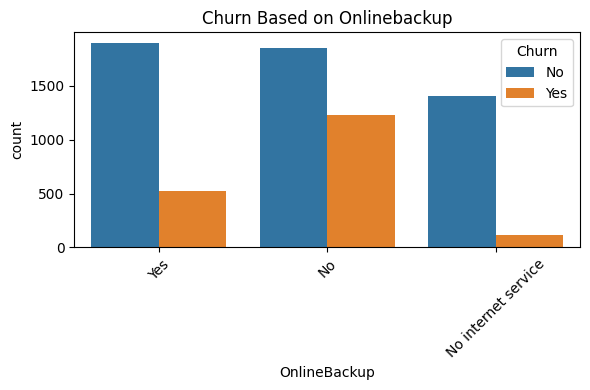

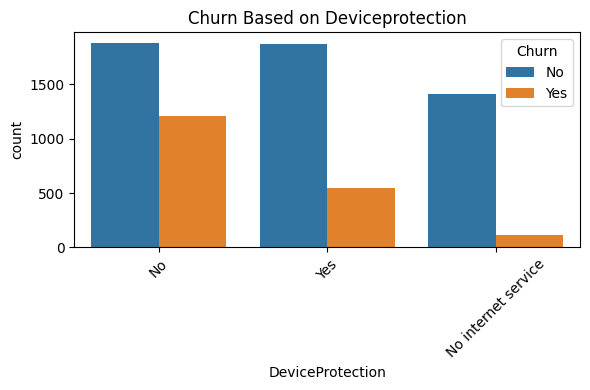

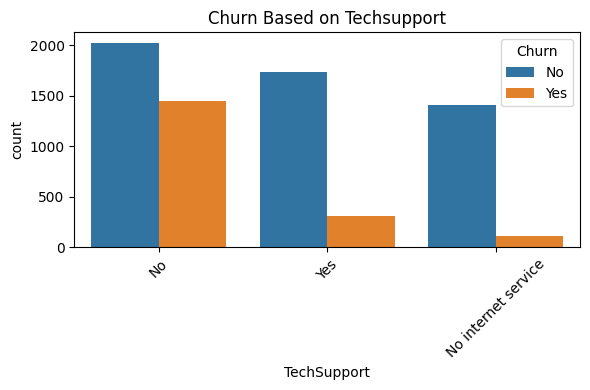

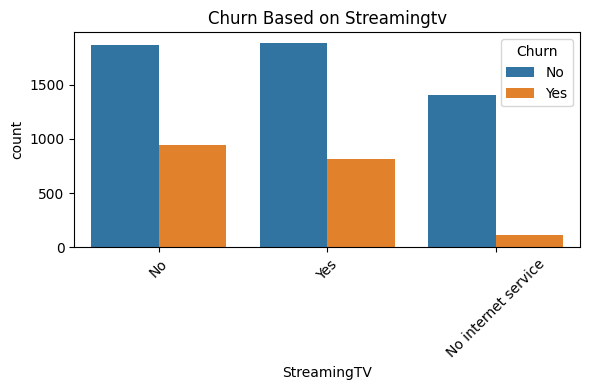

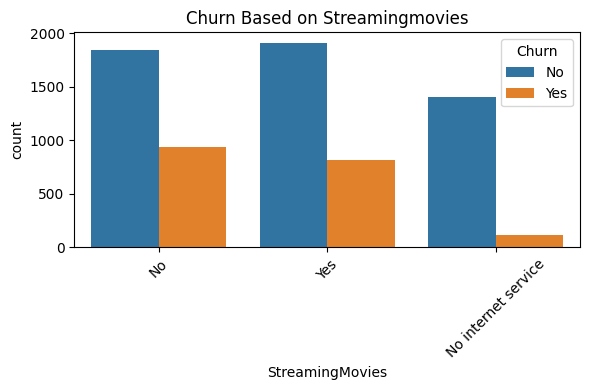

In [18]:
plot_grouped_categorical(Service_cols, 'Services')

##### 6. Feature Engineering

###### 6.1 Encode categorical features


In [19]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [20]:
df_encoded = pd.get_dummies(df, drop_first=True)

###### 6.2 Define features and target


In [21]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

###  MUlticolinearity Check (VIF)


In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
X_vif = X.select_dtypes(include=[np.number]).copy()
X_vif = X_vif.loc[:, X_vif.apply(pd.Series.nunique) > 1]
X_vif['intercept'] = 1

In [24]:
vif_df = pd.DataFrame()
vif_df['Feature'] = X_vif.columns
vif_df['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_df.sort_values(by='VIF', ascending=False))

          Feature        VIF
4       intercept  14.989702
3    TotalCharges   9.543891
1          tenure   5.847215
2  MonthlyCharges   3.314481
0   SeniorCitizen   1.054455


###### Insight:

* Total Charges has strong multicolinearity. so we need to drop this

In [25]:
X = X.drop(columns=['TotalCharges'])

###### 6.3 Scale features


In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##### 7 Modeling: Logistic Regression

###### 7.1 Train-test split


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

###### 7.2 Fit model


In [28]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

###### 7.3 Predict


In [29]:
y_pred = model.predict(X_test)

###### 7.4 Evaluation

In [30]:
print("Accuracy {} %".format( accuracy_score(y_pred, y_test) * 100 ))

Accuracy 80.38379530916845 %


###### 7.5 Confusion Matrix

<Axes: >

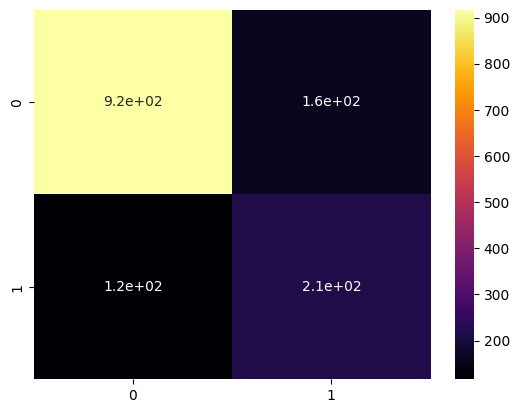

In [31]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True,cmap='inferno')

###### 7.6 Classification Report

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



###### 8. ROC-AUC

In [33]:
y_prob = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.83


###### 8.1 ROC Curve


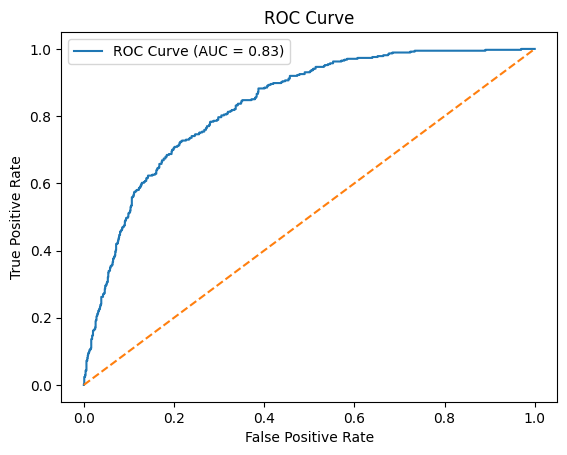

In [34]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

###### 9. Feature Importance (Coefficient & Interpretations)

In [35]:
coefs = pd.Series(model.coef_[0], index=X.columns)
odds_ratio = np.exp(coefs)

In [36]:
insight_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefs,
    'Odds Ratio': odds_ratio,
    'Direction': np.where(coefs > 0, '⬆ Increasing Churn Rate', '⬇ Decreasing Churn Rate')
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(insight_df.head(15))

                                                                   Feature  \
tenure                                                              tenure   
InternetService_Fiber optic                    InternetService_Fiber optic   
MonthlyCharges                                              MonthlyCharges   
Contract_Two year                                        Contract_Two year   
Contract_One year                                        Contract_One year   
StreamingTV_Yes                                            StreamingTV_Yes   
StreamingMovies_Yes                                    StreamingMovies_Yes   
MultipleLines_Yes                                        MultipleLines_Yes   
PaymentMethod_Electronic check              PaymentMethod_Electronic check   
PaperlessBilling_Yes                                  PaperlessBilling_Yes   
OnlineSecurity_Yes                                      OnlineSecurity_Yes   
Dependents_Yes                                              Depe

In [37]:
# Buat DataFrame dari koefisien
coef_df = pd.DataFrame({
    'Feature': coefs.index,
    'Coef': coefs.values,
    'Direction': ['Positive' if val > 0 else 'Negative' for val in coefs.values]
})

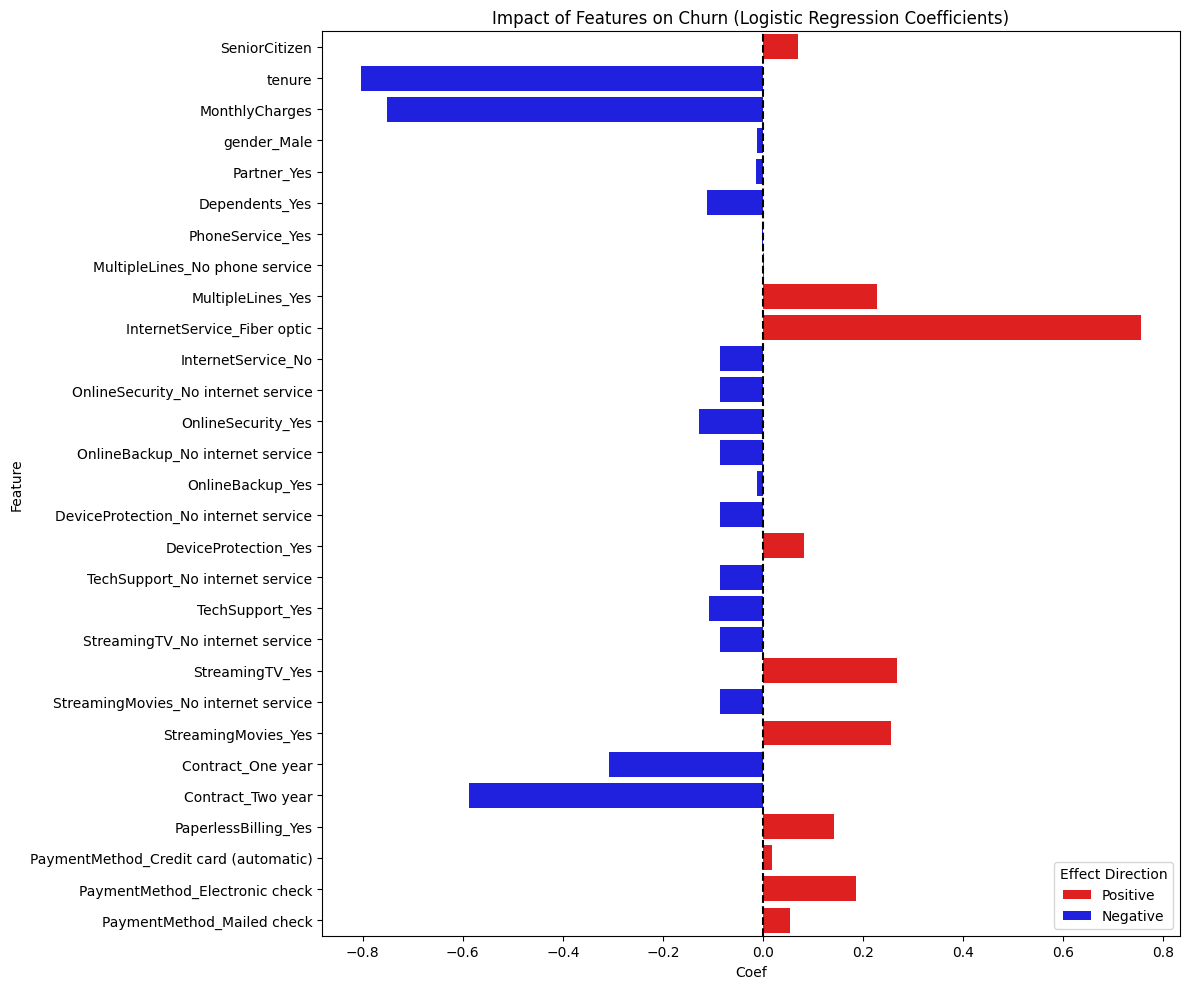

In [38]:
plt.figure(figsize=(12, 10))
sns.barplot(data=coef_df, x='Coef', y='Feature', hue='Direction', dodge=False, palette={'Positive': 'red', 'Negative': 'blue'})
plt.axvline(0, color='black', linestyle='--')
plt.title("Impact of Features on Churn (Logistic Regression Coefficients)")
plt.legend(title='Effect Direction', loc='lower right')
plt.tight_layout()
plt.show()

##  Top Feature Interpretations & Recommendations (Logistic Regression)

Based on the latest logistic regression model, here are the **Top 3 most influential features** in each category — **Demographic, Financial, and Service-related** — along with strategic business recommendations.  
(*Positive coefficients = higher churn risk, negative = lower churn risk*)

---

###  Demographic Features

#### 1. `tenure`  
- **Coefficient**: -0.80 | **Odds Ratio**: 0.45  
- The strongest churn-reducing factor. Longer tenure significantly lowers the likelihood of churn.  
- 🔧 **Recommendation**: Prioritize **early customer onboarding and engagement strategies** to increase tenure from the start.

#### 2. `Dependents_Yes`  
- **Coefficient**: -0.11 | **Odds Ratio**: 0.89  
- Customers with dependents are slightly less likely to churn.  
- 🔧 **Recommendation**: Offer **family or household plans** to appeal to these customers and increase retention.

#### 3. `SeniorCitizen`, `gender`, or `Partner`  
- These features did **not appear among the top influencers**, indicating they may not significantly affect churn.  
-  No action needed based on the current model.

---

###  Financial Features

#### 1. `MonthlyCharges`  
- **Coefficient**: -0.75 | **Odds Ratio**: 0.47  
- **Unexpectedly**, customers with higher monthly bills are **less likely to churn**.  
- 🔧 **Recommendation**: These may be **premium or high-commitment users** — consider offering them **VIP loyalty programs** or **dedicated support** to reinforce loyalty.

#### 2. `Contract_Two year`  
- **Coefficient**: -0.59 | **Odds Ratio**: 0.56  
- Two-year contracts are strongly associated with lower churn.  
- 🔧 **Recommendation**: Promote long-term contracts with **discounts, cashback offers, or exclusive perks**.

#### 3. `PaymentMethod_Electronic check`  
- **Coefficient**: +0.19 | **Odds Ratio**: 1.20  
- This payment method is linked to higher churn rates.  
- 🔧 **Recommendation**: Offer **alternative payment options** (e.g., credit cards or auto-pay setups) and investigate user friction with electronic checks.

---

###  Service Features

#### 1. `InternetService_Fiber optic`  
- **Coefficient**: +0.76 | **Odds Ratio**: 2.13  
- Customers using fiber optic internet are over **2× more likely to churn**.  
- 🔧 **Recommendation**: Investigate potential fiber service issues — such as **price sensitivity, reliability, or unmet expectations** — and take corrective action.

#### 2. `StreamingTV_Yes`  
- **Coefficient**: +0.27 | **Odds Ratio**: 1.31  
- Customers with a TV streaming service are more likely to churn.  
- 🔧 **Recommendation**: Consider bundling streaming services with **discounted plans or exclusive content offers** to improve stickiness.

#### 3. `OnlineSecurity_Yes`  
- **Coefficient**: -0.13 | **Odds Ratio**: 0.88  
- Customers subscribed to online security services tend to churn less.  
- 🔧 **Recommendation**: Highlight **online security as a value-added service**, especially during onboarding or in upselling strategies.



##  Conclusion

This logistic regression analysis successfully identified key drivers of customer churn in the telecom industry. The model performed well and generated insights that align with real-world business understanding.

 The model achieved:
- **Accuracy**: 80%
- **ROC-AUC**: 0.83  
This indicates strong predictive performance and good separation between churn and non-churn classes.

---

###  Key Takeaways:
- **Tenure**, **long-term contracts**, and **value-added services** (like Online Security and Tech Support) significantly **reduce churn**.
- **Fiber optic internet** and **streaming services** are associated with **higher churn**, possibly due to pricing or service quality expectations.
- **MonthlyCharges**, although counterintuitive, appeared as a churn-reducing factor — suggesting that **premium customers may be more loyal**, highlighting the need for **customer segmentation**.

###  Business Implications:
- Focus retention strategies on **new customers**, promoting **long-term contracts** and **added-value services** early.
- Review and improve the **experience of fiber optic customers** — especially those using streaming services.
- Identify and reward **high-value customers** through **personalized loyalty programs** to maintain engagement.

Overall, this model provides actionable insights that can help guide churn reduction strategies and improve customer lifetime value.

---
